In [1]:
# single file & receipt creation, then deletion
from swan.copier import Copier
from swan.receipts import Receipts
data = []
copy = Copier(url='https://www.federalreserve.gov/monetarypolicy/fomchistorical2017.htm')
if copy.download('./fed.txt'):
    data.append({"file":copy.url, "path":f'{copy.path}'})
receipts = Receipts(path='./fed.csv', data=data)
receipts.create(True)
receipts.write(False)
# copy.destroy(confirm=copy.path.split('/')[-1])
# receipts.destroy(confirm=receipts.path.split('/')[-1])

ℹ️ INFO: written - ./fed.txt
🚨 WARN: path not found
☕️ WAIT: no header set - attempting `.keys()`
🌊 SUCCESS: headers detected as ['file', 'path'] from `.keys()`
ℹ️ INFO: [file, path, ts] header used
ℹ️ INFO: created ./fed.csv
ℹ️ INFO: timestamped - 2023-09-01 20:35:15.605862
🌊 SUCCESS: 1 written to ./fed.csv


In [2]:
integer = receipts.seek(line=0)
string = receipts.seek(line='monetarypolicy')
by_date = receipts.seek(line='2023-08-31')
print(integer)
print(string)
print(by_date)

ℹ️ INFO: found monetarypolicy in data
ℹ️ INFO: found 2023-08-31 in data
{'file': 'https://www.federalreserve.gov/monetarypolicy/fomchistorical2017.htm', 'path': './fed.txt', 'ts': '2023-09-01 20:35:15.605862'}
[{'file': 'https://www.federalreserve.gov/monetarypolicy/fomchistorical2017.htm', 'path': './fed.txt', 'ts': '2023-09-01 20:35:15.605862'}]
[]


In [3]:
# recursive mode with three filetypes, and whole directory deletion
from swan.copier import Copier
from swan.receipts import Receipts

copy = Copier(url='https://www.federalreserve.gov/monetarypolicy/fomchistorical2017.htm', recurse=True)
data=[]
files = copy.download('./fed', types=['csv','xml','pdf'])[0]
for file in files:
    data.append({"file":file, "path":f'{copy.path}/{file.split("/")[-1]}'})
receipts = Receipts('./fed.csv', data=data)
receipts.create(False)
receipts.write(False)
copy.destroy(confirm=copy.path.split('/')[-1])
receipts.destroy(confirm=receipts.path.split('/')[-1])

☕️ WAIT: processing https://www.federalreserve.gov/monetarypolicy/fomchistorical2017.htm


100%|██████████| 326/326 [00:00<00:00, 169793.01it/s]

ℹ️ INFO: found - https://www.federalreserve.gov/monetarypolicy/beigebook/files/Beigebook_20170118.pdf
ℹ️ INFO: found - https://www.federalreserve.gov/monetarypolicy/files/FOMC20170201tealbooka20170123.pdf
ℹ️ INFO: found - https://www.federalreserve.gov/monetarypolicy/files/FOMC20170201tealbookb20170126.pdf
ℹ️ INFO: found - https://www.federalreserve.gov/monetarypolicy/files/FOMC20170201Agenda.pdf
ℹ️ INFO: found - https://www.federalreserve.gov/monetarypolicy/files/FOMC_LongerRunGoals_201701.pdf
ℹ️ INFO: found - https://www.federalreserve.gov/monetarypolicy/files/fomcminutes20170201.pdf
ℹ️ INFO: found - https://www.federalreserve.gov/monetarypolicy/files/FOMC20170201meeting.pdf
ℹ️ INFO: found - https://www.federalreserve.gov/monetarypolicy/files/FOMC20170201material.pdf
ℹ️ INFO: found - https://www.federalreserve.gov/monetarypolicy/files/Beigebook_20170301.pdf
ℹ️ INFO: found - https://www.federalreserve.gov/monetarypolicy/files/FOMC20170315tealbooka20170303.pdf
ℹ️ INFO: found - https://

ℹ️ INFO: written - ./fed/Beigebook_20170118.pdf
ℹ️ INFO: written - ./fed/FOMC20170201tealbooka20170123.pdf
ℹ️ INFO: written - ./fed/FOMC20170201tealbookb20170126.pdf
ℹ️ INFO: written - ./fed/FOMC20170201Agenda.pdf
ℹ️ INFO: written - ./fed/FOMC_LongerRunGoals_201701.pdf
ℹ️ INFO: written - ./fed/fomcminutes20170201.pdf
ℹ️ INFO: written - ./fed/FOMC20170201meeting.pdf
ℹ️ INFO: written - ./fed/FOMC20170201material.pdf
ℹ️ INFO: written - ./fed/Beigebook_20170301.pdf
ℹ️ INFO: written - ./fed/FOMC20170315tealbooka20170303.pdf
ℹ️ INFO: written - ./fed/FOMC20170315tealbookb20170309.pdf
ℹ️ INFO: written - ./fed/FOMC20170315Agenda.pdf
ℹ️ INFO: written - ./fed/fomcminutes20170315.pdf
ℹ️ INFO: written - ./fed/FOMC20170315SEPcompilation.pdf
ℹ️ INFO: written - ./fed/FOMC20170315SEPkey.pdf
ℹ️ INFO: written - ./fed/FOMC20170315meeting.pdf
ℹ️ INFO: written - ./fed/FOMC20170315material.pdf
ℹ️ INFO: written - ./fed/Beigebook_20170419.pdf
ℹ️ INFO: written - ./fed/FOMC20170503tealbooka20170421.pdf
ℹ️ INFO: 

In [4]:
from swan.supplies import Custom
data = 'linkbase:hello there'
SECSifter = Custom(copy=data)

# example custom anonymous function
SECSifter.sift = lambda _: '' if _.startswith('linkbase:') else _

sifted = SECSifter.sift(data)
print(sifted)

In [5]:
data = '<html>hello there</html>'
from swan.supplies import Broom
clean = Broom(copy=data).sweep()
print(clean)
xml = '<TITLE>hello there</TITLE>'
clean = Broom(copy=xml).sweep(xml=True)
print(clean)

hello there
TITLE: hello there



In [6]:
from swan.janitor import Janitor
worker = Janitor(path='./fed.txt', o='./fed_processed.txt')
worker.process()
worker.destroy(confirm=worker.o.split('/')[-1])

ℹ️ INFO: written - ./fed_processed.txt
🚨 WARN: fed_processed.txt destroyed from ./fed_processed.txt


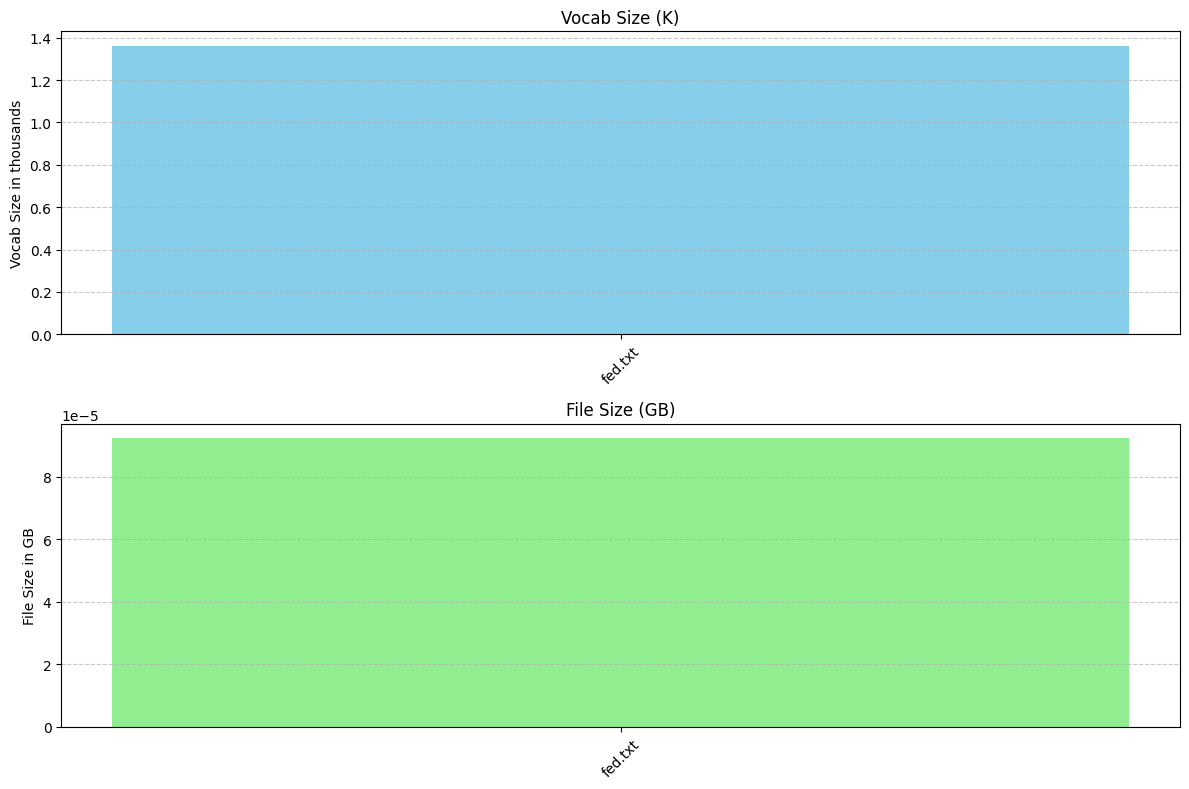

In [7]:
from swan.teacher import SP

copy = './fed.txt'
save='./plot.png'

p = SP(copy, save)
p.generate(show=True)
# p.destroy(confirm=p.save.split('/')[-1])

In [8]:
# declare existing config from file
from swan.config import Config
example = Config("./config.json")
# put it in memory
conf = example.use()
_l = lambda _: list(_)
print(_l(conf.keys()))
print(conf["settings"]["name"])
# change a value & save
conf["settings"]["name"] = 'example'
example.save()
# remove from memory
c, conf = (None, None)
# load again
example = Config("./config.json")
conf = example.use()
role, name = conf['role'], conf['settings']['name']
# see that the value has changed
print(f'{role}: {name}')

🌊 SUCCESS: config loaded from - /Users/dylanmoore/VSCode/LLM/swan_scrape.git/config.json
['role', 'settings']
test
🌊 SUCCESS: config saved to - /Users/dylanmoore/VSCode/LLM/swan_scrape.git/config.json (overwrite)
🌊 SUCCESS: config loaded from - /Users/dylanmoore/VSCode/LLM/swan_scrape.git/config.json
server: example


In [9]:
# overrides
example.unbox(True)
example.unbox()
example.destroy('example')

🌊 SUCCESS: unboxed! 🦢📦 - /Users/dylanmoore/VSCode/LLM/swan_scrape.git/example 
☠️ FATAL: exists - /Users/dylanmoore/VSCode/LLM/swan_scrape.git/example
🚨 WARN: example destroyed


In [10]:
# initialize from memory i.e. API response
fin_conf = {
    "role": "server",
    "settings": {
        "name": "fin-swan",
        "proj_dir": "/Users/dylanmoore/VSCode/LLM/swan_scrape.git/",
        "jobs": [
            {
                "url": "https://www.federalreserve.gov/monetarypolicy/fomchistorical2017.htm",
                "types": [],
                "janitor": 0,
                "custom": [
                    {
                        "func": ""
                        , "types": [""]
                    }
                ]
            }
        ]
    }
}
direct_load = Config(fin_conf)
direct_load.use()
direct_load.destroy('fin-swan')

🌊 SUCCESS: unboxed! 🦢📦 using - /Users/dylanmoore/VSCode/LLM/swan_scrape.git/fin-swan/config.json 
🌊 SUCCESS: config loaded from - /Users/dylanmoore/VSCode/LLM/swan_scrape.git/fin-swan/config.json/config.json
🚨 WARN: fin-swan destroyed


In [4]:
# all together now 🎶
from swan.copier import Copier
from swan.receipts import Receipts
from swan.config import Config
from swan.janitor import Janitor
import os

fin_conf = {
    "role": "server",
    "settings": {
        "name": "fin-swan",
        "proj_dir": "/Users/dylanmoore/VSCode/LLM/swan_scrape.git/",
        "jobs": [
            {
                "url": "https://www.federalreserve.gov/monetarypolicy/fomchistorical2017.htm",
                "types": [],
                "janitor": 0,
                "custom": [
                    {
                        "func": ""
                        , "types": [""]
                    }
                ]
            }
        ]
    }
}
direct_load = Config(fin_conf)
c = direct_load.use()
p = os.path.join(c['settings']['proj_dir'], c['settings']['name'])
data = []
for job in c['settings']['jobs']:
    copy = Copier(url=job['url'])
    if copy.download(p+'/fed.txt'):
        data.append({"file":copy.url, "path":f'{copy.path}'})
receipts = Receipts(path=p+'/fed.csv', data=data)
receipts.create()
receipts.write()
worker = Janitor(p+'/fed.txt', o=p+'/fed_processed.txt')
worker.process()

🌊 SUCCESS: unboxed! 🦢📦 using - /Users/dylanmoore/VSCode/LLM/swan_scrape.git/fin-swan/config.json 
🌊 SUCCESS: config loaded from - /Users/dylanmoore/VSCode/LLM/swan_scrape.git/fin-swan/config.json/config.json
ℹ️ INFO: written - /Users/dylanmoore/VSCode/LLM/swan_scrape.git/fin-swan/fed.txt
🚨 WARN: receipts first create
☕️ WAIT: no header set - attempting `.keys()`
🌊 SUCCESS: headers detected as ['file', 'path'] from `.keys()`
ℹ️ INFO: [file, path, ts] header used
ℹ️ INFO: created /Users/dylanmoore/VSCode/LLM/swan_scrape.git/fin-swan/fed.csv
ℹ️ INFO: timestamped - 2023-09-01 20:50:01.466241
🌊 SUCCESS: 1 written to /Users/dylanmoore/VSCode/LLM/swan_scrape.git/fin-swan/fed.csv
ℹ️ INFO: written - /Users/dylanmoore/VSCode/LLM/swan_scrape.git/fin-swan/fed_processed.txt


In [5]:
# that easy
direct_load.destroy('fin-swan')

🚨 WARN: fin-swan destroyed
